In [1]:
from nilearn.image import smooth_img, load_img
import numpy as np


In [18]:
from glob import glob

bold_files = sorted(
    glob(
        '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/*/contrast_brief_effect_size_sub_*.nii.gz'
    )
)

In [12]:
len(bold_files)

101

In [20]:
from nilearn.input_data import NiftiMasker
from nilearn.image import new_img_like, concat_imgs
import numpy as np

# Create a single masker instance
masker = NiftiMasker(smoothing_fwhm=None, standardize=False, memory=None)

all_masks = []

for f in bold_files:
    print(f)
    masker.fit(f)  # fit on current run
    mask_data = masker.mask_img_.get_fdata().astype(np.int16)
    # Create a 3D image for this mask
    mask_img_3d = new_img_like(masker.mask_img_, mask_data)
    all_masks.append(mask_img_3d)

# Concatenate all masks into a 4D image
all_masks_4d = concat_imgs(all_masks)

# Sum across runs (4th dimension)
sum_mask_data = np.sum(all_masks_4d.get_fdata(), axis=3)
sum_mask_img = new_img_like(all_masks_4d, sum_mask_data)


/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/061/contrast_brief_effect_size_sub_061.nii.gz
/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/130/contrast_brief_effect_size_sub_130.nii.gz
/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/172/contrast_brief_effect_size_sub_172.nii.gz
/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/192/contrast_brief_effect_size_sub_192.nii.gz
/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_question_estimates/within_subject_results/234/contrast_brief_effect_size_sub_234.nii.gz
/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/survey_medley_results/within_subject_qu

In [21]:
sum_mask_img.to_filename('~/sum_masker_masks_brief_contrast.nii.gz')
all_masks_4d.to_filename('~/masker_masks_brief_4d.nii.gz')

NameError: name 'plt' is not defined

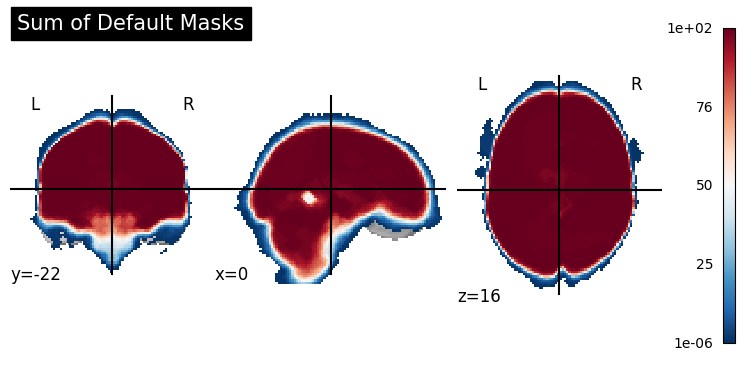

In [14]:
plot_stat_map(sum_mask_img, title='Sum of Default Masks')
plt.show()

In [2]:
from glob import glob

bold_files_4d = glob(
    '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-*/ses-*/func/sub-*_ses-*_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
)

In [3]:
len(bold_files_4d)

104

In [5]:
import os
from glob import glob
import numpy as np
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, plot_roi
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

bold = bold_files_4d[0]

# --------------------------
# Load 4D → compute mean across time
# --------------------------
img_4d = image.load_img(bold)
mean_img = image.mean_img(img_4d)

# --------------------------
# Fit masker on the mean image
# (FAST + equivalent to masking whole 4D)
# --------------------------
masker = NiftiMasker(smoothing_fwhm=None, standardize=False, mask_strategy='epi')
masker.fit(mean_img)
mask_img = masker.mask_img_

/tmp/ipykernel_12372/1270017741.py:5: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiMasker


/tmp/ipykernel_12372/1270017741.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(img_4d)


/tmp/ipykernel_196905/1722697092.py:49: UserWarning: kwargs['alpha']=0.5 detected in parameters.
Overriding with transparency=None.
To suppress this warning pass your 'alpha' value via the 'transparency' parameter.
  disp3.add_overlay(mask_img, cmap='YlOrBr', alpha=0.5)  # semi-transparent yellow


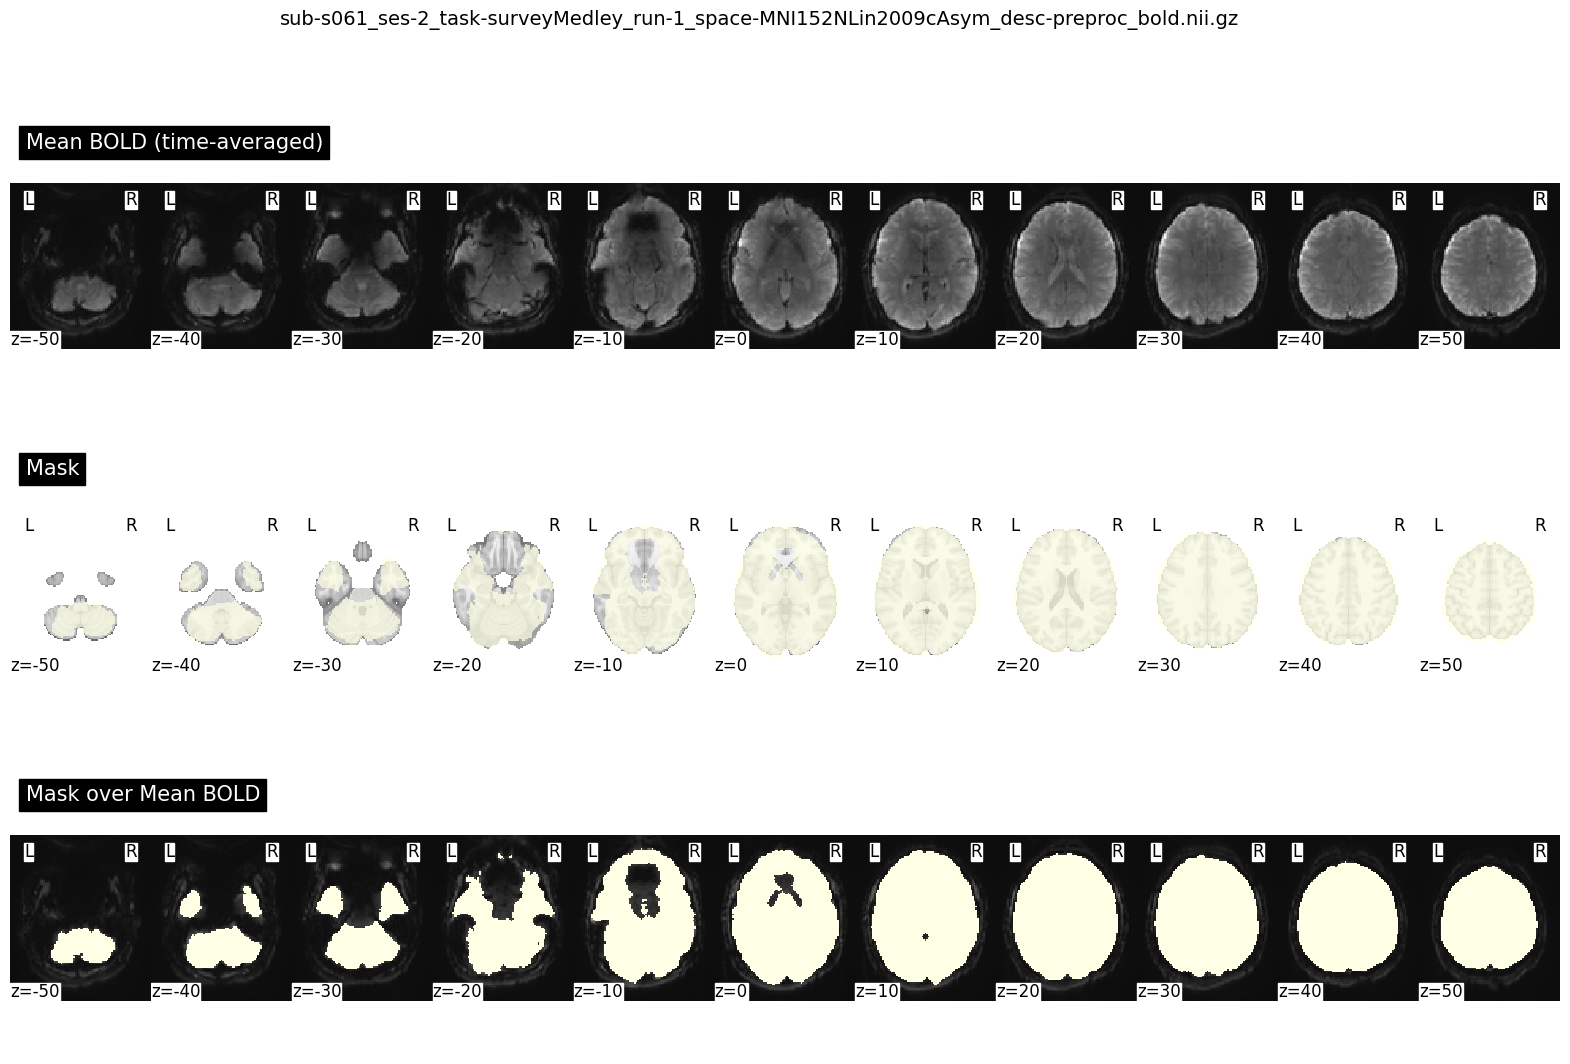

In [51]:
from nilearn import image, plotting


# --------------------------
# Prepare figure
# --------------------------
fig, axes = plt.subplots(3, 1, figsize=(20, 12))
fig.suptitle(os.path.basename(bold), fontsize=14)

# --------------------------
# Panel 1 → Mean BOLD
# --------------------------
disp1 = plotting.plot_epi(
    mean_img,
    cut_coords=z_slices,
    display_mode='z',
    colorbar=False,
    black_bg=False,
    axes=axes[0],
    title='Mean BOLD (time-averaged)',
)

# --------------------------
# Panel 2 → Mask alone
# --------------------------
disp2 = plotting.plot_roi(
    mask_img,
    cut_coords=z_slices,
    display_mode='z',
    colorbar=False,
    cmap='YlOrBr',
    black_bg=False,
    axes=axes[1],
    title='Mask',
)

# --------------------------
# Panel 3 → Mask overlay on Mean BOLD
# --------------------------
disp3 = plotting.plot_epi(
    mean_img,
    cut_coords=z_slices,
    display_mode='z',
    colorbar=False,
    black_bg=False,
    axes=axes[2],
    title='Mask over Mean BOLD',
)
disp3.add_overlay(mask_img, cmap='YlOrBr', alpha=0.5)  # semi-transparent yellow

# --------------------------
# Turn off axes
# --------------------------
for ax in axes:
    ax.axis('off')

plt.show()

In [6]:
bg_data = mean_img.get_fdata()
vmin = np.percentile(bg_data, 2)  # ignore extreme low values
vmax = np.percentile(bg_data, 98)

In [7]:
print(vmin, vmax)

0.0 9244.363242187506


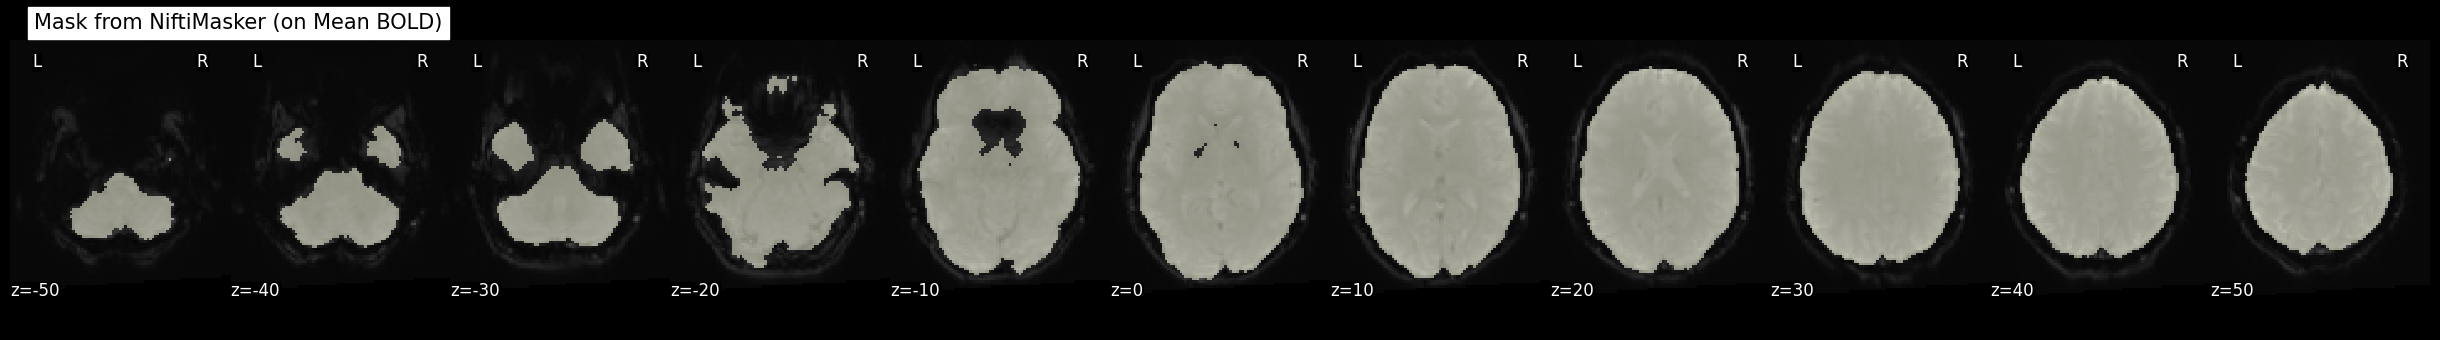

In [13]:
plot_roi(
    mask_img,
    bg_img=mean_img,  # background is mean fMRI
    title='Mask from NiftiMasker (on Mean BOLD)',
    display_mode='z',
    cut_coords=z_slices,
    alpha=0.5,  # mask transparency (0=transparent, 1=opaque)
    cmap='YlOrBr',
    colorbar=False,
)

plt.show()

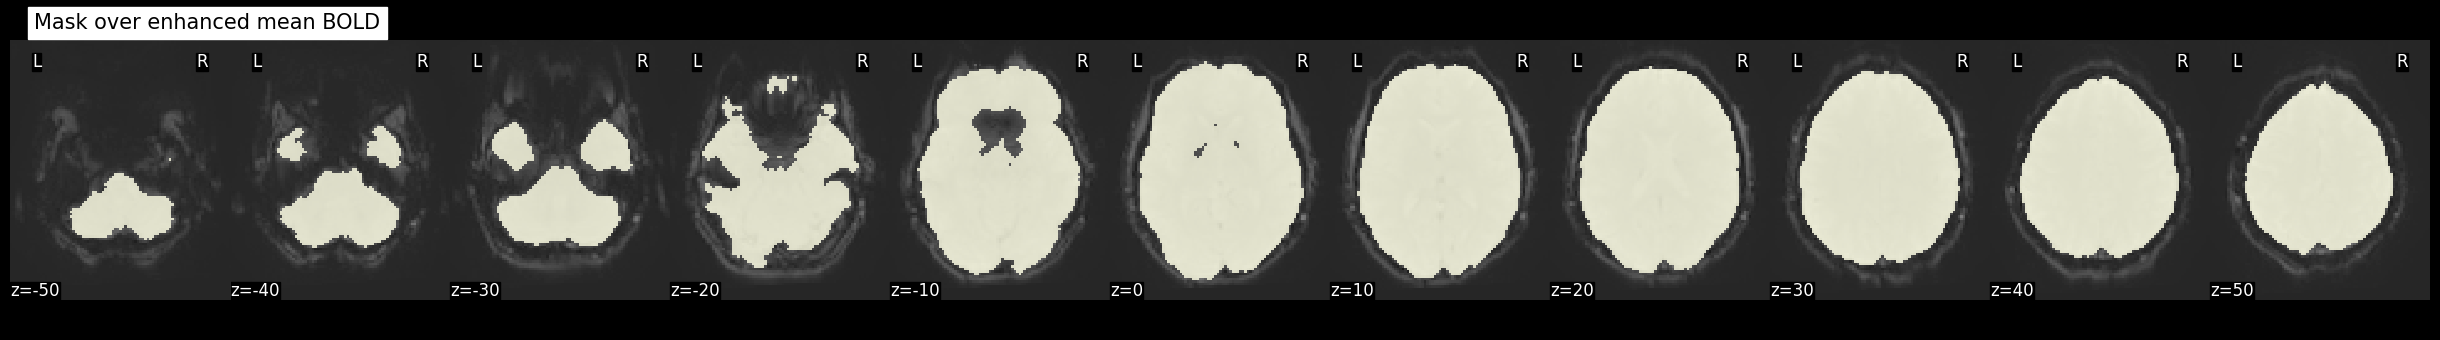

In [16]:
from nilearn.image import new_img_like
import numpy as np

bg_data = mean_img.get_fdata()

# Linear stretch with amplification
bg_data_scaled = (bg_data - bg_data.min()) / (bg_data.max() - bg_data.min())
bg_data_scaled = bg_data_scaled**0.5  # gamma >1 brightens midrange values
bg_data_scaled = np.clip(bg_data_scaled, 0, 1)

mean_img_scaled = new_img_like(mean_img, bg_data_scaled)

plot_roi(
    mask_img,
    bg_img=mean_img_scaled,
    alpha=0.8,
    cmap='YlOrBr',
    display_mode='z',
    cut_coords=z_slices,
    colorbar=False,
    title='Mask over enhanced mean BOLD',
)


Processing: /oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s638/ses-2/func/sub-s638_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


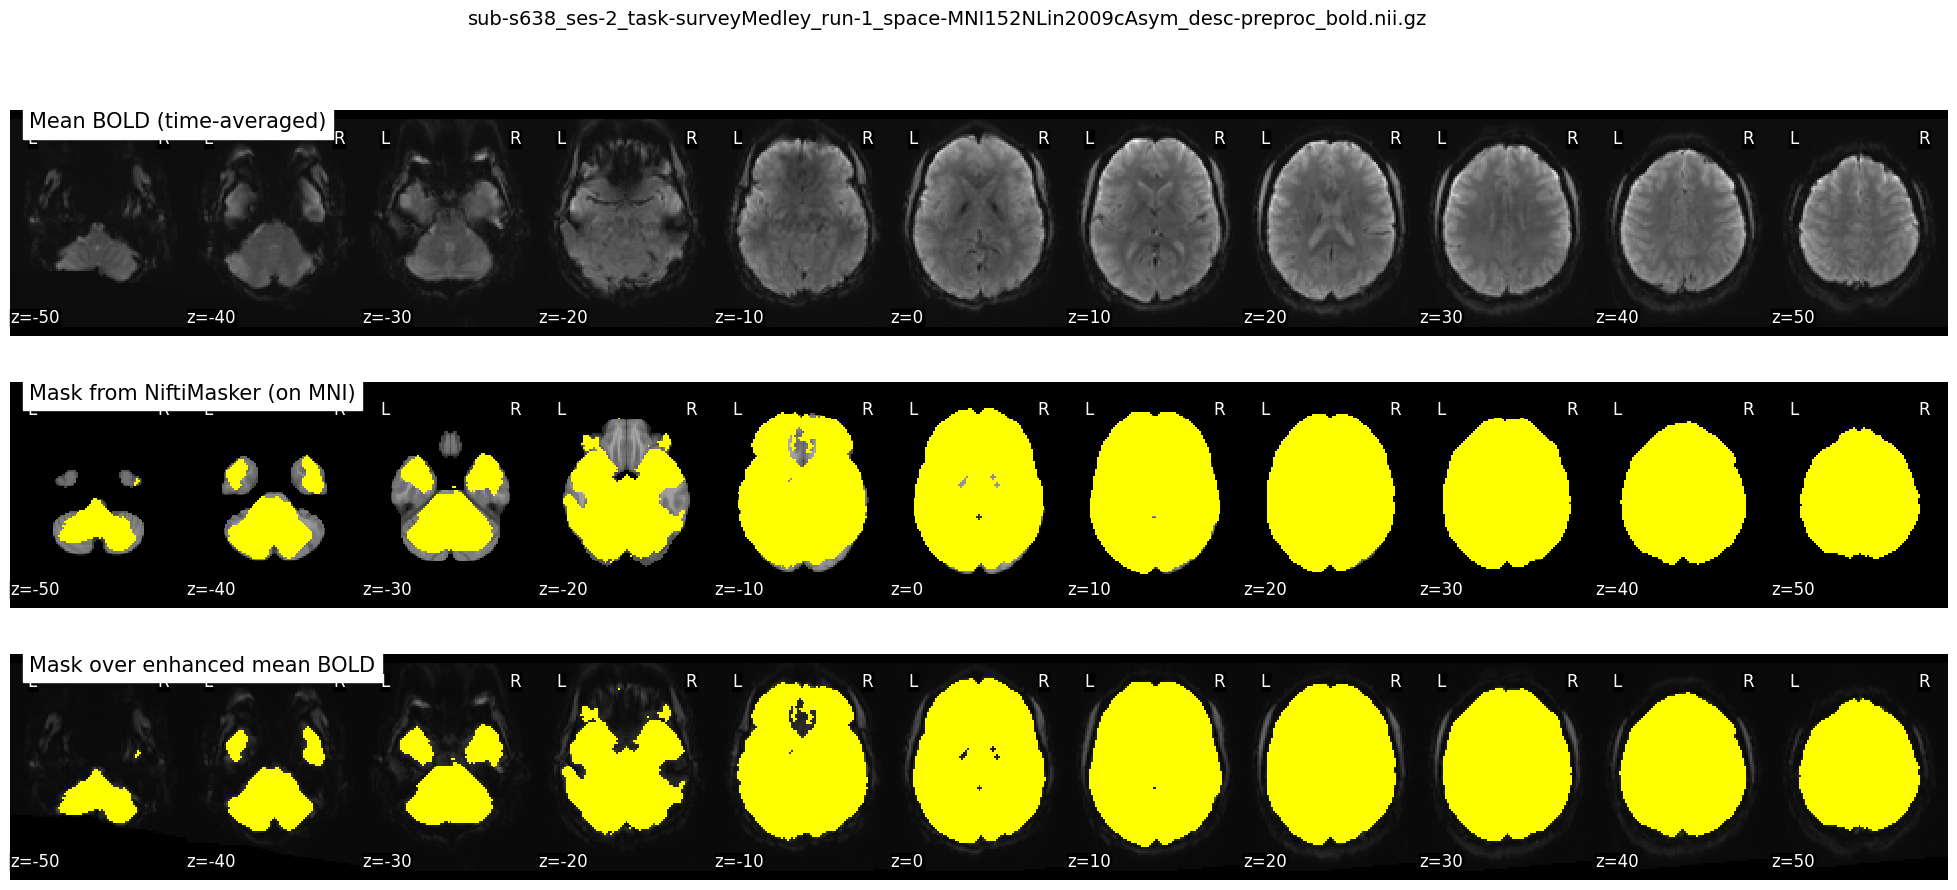

In [25]:
print(f'Processing: {bold}')
from nilearn.plotting import plot_stat_map, plot_roi, plot_epi
from matplotlib.colors import ListedColormap

z_slices = np.arange(-50, 51, 10)

# Create a colormap with a single bright yellow
yellow_cmap = ListedColormap(['yellow'])

# --------------------------
# Prepare figure
# --------------------------
fig, axes = plt.subplots(3, 1, figsize=(25, 10))
for ax in axes:
    ax.set_facecolor('white')
fig.suptitle(os.path.basename(bold), fontsize=14)

# --------------------------
# Top panel → mean image
# --------------------------
plot_epi(
    mean_img,
    display_mode='z',
    cut_coords=z_slices,
    colorbar=False,
    axes=axes[0],
    title='Mean BOLD (time-averaged)',
)

# --------------------------
# Bottom panel → mask
# --------------------------
plot_roi(
    mask_img,
    display_mode='z',
    cut_coords=z_slices,
    colorbar=False,
    cmap=yellow_cmap,
    axes=axes[1],
    title='Mask from NiftiMasker (on MNI)',
    black_bg=True,
    alpha=1,
)

bg_data = mean_img.get_fdata()

# Linear stretch with amplification
bg_data_scaled = (bg_data - bg_data.min()) / (bg_data.max() - bg_data.min())
bg_data_scaled = bg_data_scaled**0.5  # gamma >1 brightens midrange values
bg_data_scaled = np.clip(bg_data_scaled, 0, 1)

mean_img_scaled = new_img_like(mean_img, bg_data_scaled)

plot_roi(
    mask_img,
    bg_img=mean_img,
    alpha=1,
    cmap=yellow_cmap,
    display_mode='z',
    cut_coords=z_slices,
    colorbar=False,
    title='Mask over enhanced mean BOLD',
    axes=axes[2],
)


plt.show()

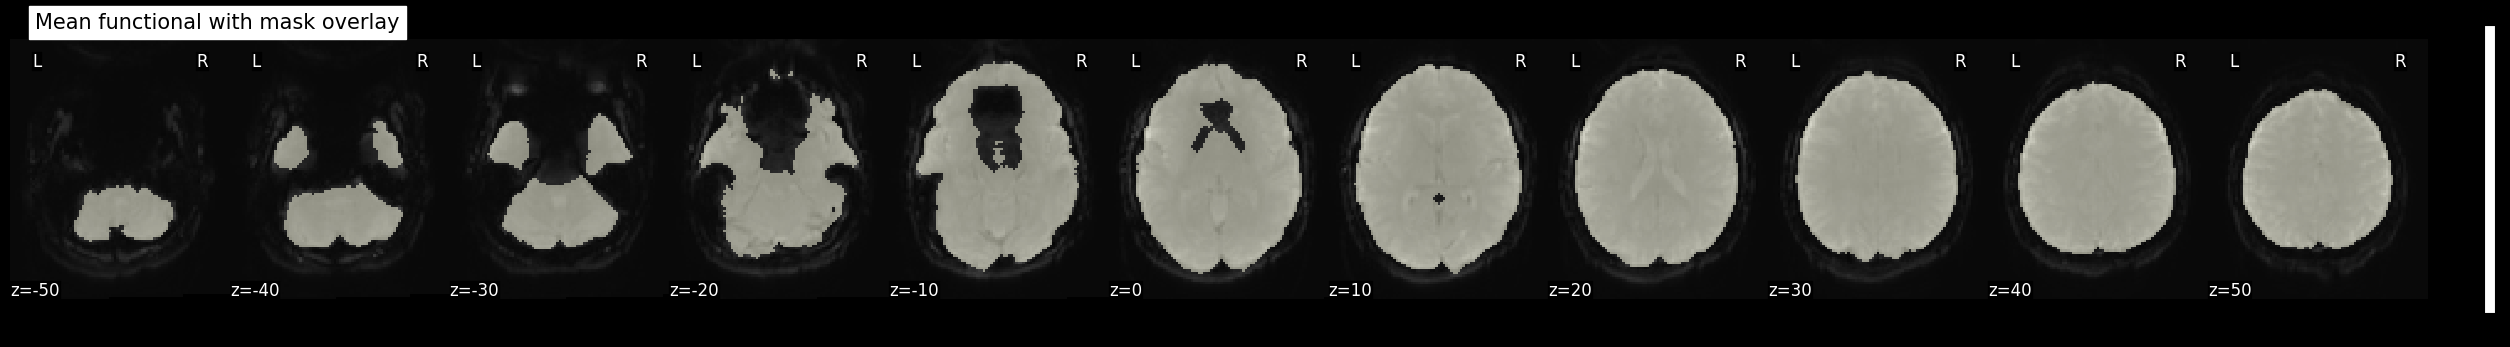

In [44]:
plot_roi(
    mask_img,
    bg_img=mean_img,  # background is mean fMRI
    title='Mean functional with mask overlay',
    display_mode='z',
    cut_coords=z_slices,
    alpha=0.5,  # mask transparency (0=transparent, 1=opaque)
    cmap='YlOrBr',
)
plt.show()

In [26]:
import os
from glob import glob
import numpy as np
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, plot_roi
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from nilearn.image import new_img_like

from matplotlib.colors import ListedColormap


# Create a colormap with a single bright yellow
yellow_cmap = ListedColormap(['yellow'])


# --------------------------
# Inputs
# --------------------------
bold_files_4d = glob(
    '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-*/ses-*/func/sub-*_ses-*_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
)
output_pdf = 'mask_and_mean_QA.pdf'


# --------------------------
# Create output PDF
# --------------------------
with PdfPages(output_pdf) as pdf:
    for bold in bold_files_4d[:3]:
        print(f'Processing: {bold}')

        # --------------------------
        # Load 4D → compute mean across time
        # --------------------------
        img_4d = image.load_img(bold)
        mean_img = image.mean_img(img_4d)

        # --------------------------
        # Fit masker on the mean image
        # (FAST + equivalent to masking whole 4D)
        # --------------------------
        masker = NiftiMasker(
            smoothing_fwhm=None, standardize=False, mask_strategy='epi'
        )
        masker.fit(mean_img)
        mask_img = masker.mask_img_

        # --------------------------
        # Prepare figure
        # --------------------------
        z_slices = np.arange(-50, 51, 10)
        fig, axes = plt.subplots(3, 1, figsize=(25, 10))

        for ax in axes:
            ax.set_facecolor('white')
        fig.suptitle(os.path.basename(bold), fontsize=14)

        # --------------------------
        # Top panel → mean image
        # --------------------------
        plot_epi(
            mean_img,
            display_mode='z',
            cut_coords=z_slices,
            colorbar=False,
            axes=axes[0],
            title='Mean BOLD (time-averaged)',
        )

        # --------------------------
        # Bottom panel → mask
        # --------------------------
        plot_roi(
            mask_img,
            display_mode='z',
            cut_coords=z_slices,
            colorbar=False,
            cmap=yellow_cmap,
            axes=axes[1],
            title='Mask from NiftiMasker (on MNI)',
            black_bg=True,
        )

        # bg_data = mean_img.get_fdata()

        # # Linear stretch with amplification
        # bg_data_scaled = (bg_data - bg_data.min()) / (bg_data.max() - bg_data.min())
        # bg_data_scaled = bg_data_scaled**0.5  # gamma >1 brightens midrange values
        # bg_data_scaled = np.clip(bg_data_scaled, 0, 1)

        # mean_img_scaled = new_img_like(mean_img, bg_data_scaled)

        plot_roi(
            mask_img,
            bg_img=mean_img,
            alpha=0.8,
            cmap=yellow_cmap,
            display_mode='z',
            cut_coords=z_slices,
            colorbar=False,
            title='Mask over enhanced mean BOLD',
            axes=axes[2],
        )

        pdf.savefig(fig)
        plt.close(fig)

print(f'\nSaved PDF: {output_pdf}')

Processing: /oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s585/ses-1/func/sub-s585_ses-1_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


/tmp/ipykernel_12372/1488606039.py:38: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_img = image.mean_img(img_4d)


Processing: /oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s596/ses-2/func/sub-s596_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Processing: /oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s638/ses-2/func/sub-s638_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz

Saved PDF: mask_and_mean_QA.pdf


In [25]:
len(bold_files_4d)

104

In [2]:
bold_file = '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s061/ses-2/func/sub-s061_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [43]:
mask_file = '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s061/ses-2/func/sub-s061_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_img = load_img(mask_file)


In [38]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt

# Load your 4D fMRI image
img_4d = load_img(bold_file)

# Extract 4D data arrays
data_orig = img_4d.get_fdata()

# Smooth the entire 4D image
smoothed_img = smooth_img(img_4d, fwhm=6)
data_smooth = smoothed_img.get_fdata()

# Apply voxel-wise scaling to the smoothed data
voxel_mean = np.mean(data_smooth, axis=3, keepdims=True)
scaled_data = data_smooth / voxel_mean * 100


/tmp/ipykernel_172764/1754371679.py:16: RuntimeWarning: invalid value encountered in divide
  scaled_data = data_smooth / voxel_mean * 100


In [55]:
slice_orig.shape

(89, 105)

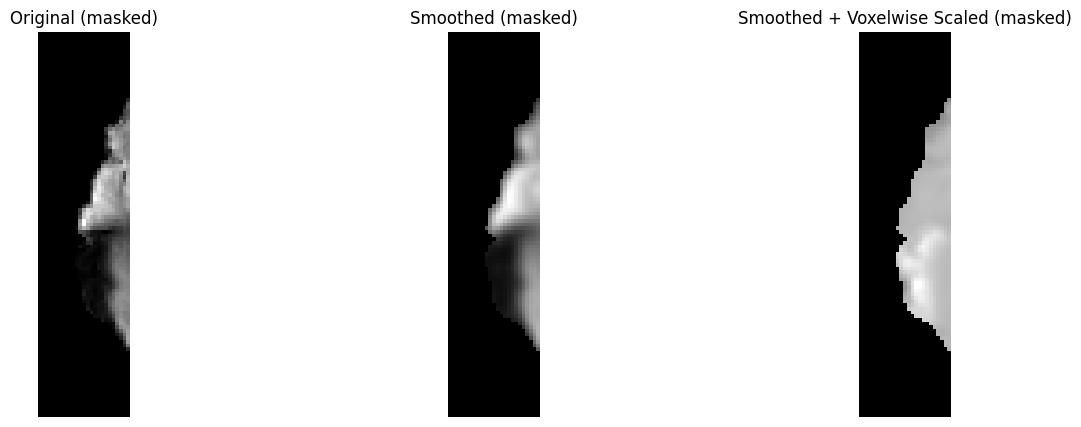

In [66]:
# Pick the slice in z-direction
z_slice = 30
timepoint_idx = 9

# Extract slices and multiply by mask
slice_orig = data_orig[:, :, z_slice, timepoint_idx] * mask_data[:, :, z_slice]
slice_smooth = data_smooth[:, :, z_slice, timepoint_idx] * mask_data[:, :, z_slice]
slice_scaled = scaled_data[:, :, z_slice, timepoint_idx] * mask_data[:, :, z_slice]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

slice_cutoff = 25

axes[0].imshow(slice_orig.T[:, :slice_cutoff], origin='lower', cmap='gray')
axes[0].set_title('Original (masked)')

axes[1].imshow(slice_smooth.T[:, :slice_cutoff], origin='lower', cmap='gray')
axes[1].set_title('Smoothed (masked)')

axes[2].imshow(slice_scaled.T[:, :slice_cutoff], origin='lower', cmap='gray')
axes[2].set_title('Smoothed + Voxelwise Scaled (masked)')

for ax in axes:
    ax.axis('off')

plt.show()

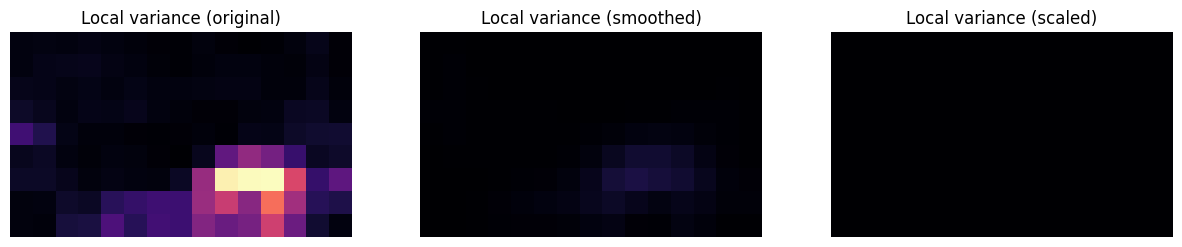

In [68]:
import numpy as np
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt

# Region of interest
x_slice = slice(35, 50)
y_slice = slice(74, 83)
z_slice = 24  # fixed z

# Pick a time point
tp = 9

# Extract region for original, smoothed, and scaled
region_orig = data_orig[x_slice, y_slice, z_slice, tp]
region_smooth = data_smooth[x_slice, y_slice, z_slice, tp]
region_scaled = scaled_data[x_slice, y_slice, z_slice, tp]


def local_variance_2d(img, size=3):
    return generic_filter(img, np.var, size=(size, size))


# Compute local variance on your 2D slices
var_orig = local_variance_2d(region_orig)
var_smooth = local_variance_2d(region_smooth)
var_scaled = local_variance_2d(region_scaled)

# Plot local variance maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
vmin = min(var_orig.min(), var_smooth.min(), var_scaled.min())
vmax = max(var_orig.max(), var_smooth.max(), var_scaled.max())

axes[0].imshow(var_orig.T, origin='lower', cmap='magma', vmin=vmin, vmax=vmax)
axes[0].set_title('Local variance (original)')

axes[1].imshow(var_smooth.T, origin='lower', cmap='magma', vmin=vmin, vmax=vmax)
axes[1].set_title('Local variance (smoothed)')

axes[2].imshow(var_scaled.T, origin='lower', cmap='magma', vmin=vmin, vmax=vmax)
axes[2].set_title('Local variance (scaled)')

for ax in axes:
    ax.axis('off')

plt.show()

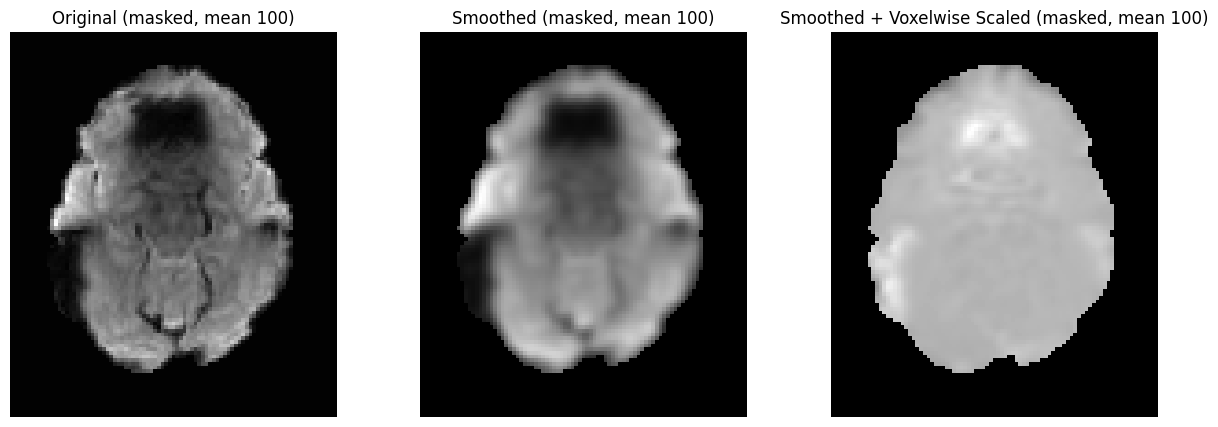

In [62]:
# Load the mask data
mask_data = mask_img.get_fdata()

# Time points to average
timepoints = 50

# Compute the mean over the first 100 time points
mean_orig = np.mean(data_orig[:, :, :, :timepoints], axis=3) * mask_data
mean_smooth = np.mean(data_smooth[:, :, :, :timepoints], axis=3) * mask_data
mean_scaled = np.mean(scaled_data[:, :, :, :timepoints], axis=3) * mask_data

# Pick the slice in z-direction
z_slice = 30

slice_orig = mean_orig[:, :, z_slice]
slice_smooth = mean_smooth[:, :, z_slice]
slice_scaled = mean_scaled[:, :, z_slice]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(slice_orig.T, origin='lower', cmap='gray')
axes[0].set_title('Original (masked, mean 100)')

axes[1].imshow(slice_smooth.T, origin='lower', cmap='gray')
axes[1].set_title('Smoothed (masked, mean 100)')

axes[2].imshow(slice_scaled.T, origin='lower', cmap='gray')
axes[2].set_title('Smoothed + Voxelwise Scaled (masked, mean 100)')

for ax in axes:
    ax.axis('off')

plt.show()


In [ ]:
# Plot the original timepoint
plot_stat_map(
    timepoint_10,
    title='Original 10th Timepoint',
    display_mode='ortho',
    cut_coords=(0, 0, 0),  # You can change to focus on a particular region
    colorbar=True,
)

# Plot the smoothed timepoint
plot_stat_map(
    smoothed_timepoint_10,
    title='Smoothed 10th Timepoint',
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    colorbar=True,
)

plt.show()

/tmp/ipykernel_172764/970872230.py:1: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_unsmoothed = mean_img(img_4d)
/tmp/ipykernel_172764/970872230.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  mean_smoothed = mean_img(smoothed_img)


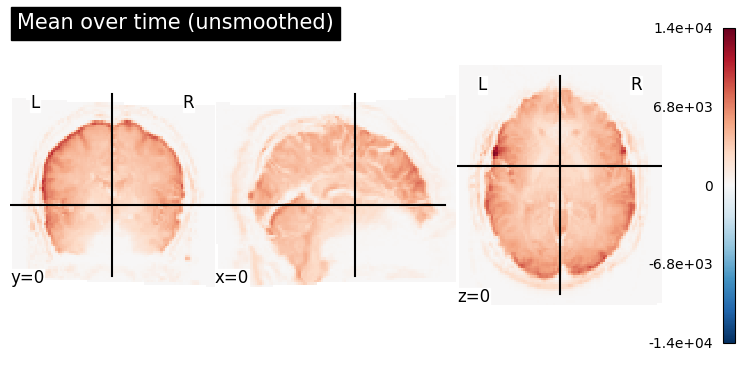

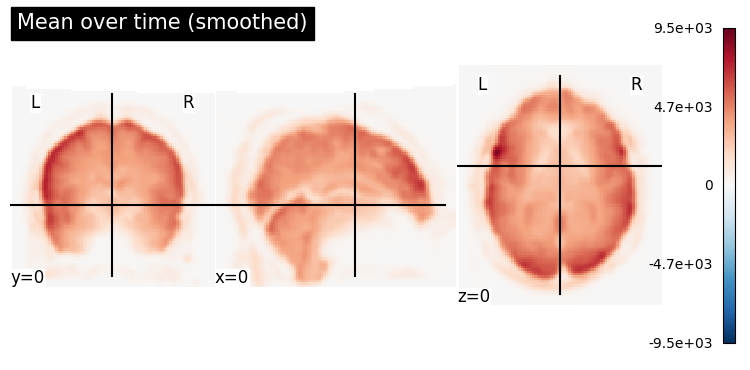

In [35]:
mean_unsmoothed = mean_img(img_4d)

mean_smoothed = mean_img(smoothed_img)

# Plot unsmoothed mean
plot_stat_map(
    mean_unsmoothed,
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    title='Mean over time (unsmoothed)',
    colorbar=True,
)

# Plot smoothed mean
plot_stat_map(
    mean_smoothed,
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    title='Mean over time (smoothed)',
    colorbar=True,
)

plt.show()

In [36]:
mean_smoothed.to_filename('~/mean_smoothed.nii.gz')

In [34]:
mask_file = '/oak/stanford/groups/russpold/data/uh2/aim1/derivatives/fmriprep/sub-s061/ses-2/func/sub-s061_ses-2_task-surveyMedley_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_img = load_img(mask_file)


In [69]:
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import load_img, mean_img, new_img_like
from nilearn.plotting import plot_stat_map
import numpy as np
import pandas as pd

# Load mask image

# Create a "design matrix" with a single constant regressor
# Number of time points = number of volumes in bold
# Create a design matrix with a single constant regressor
bold_img = load_img(bold_file)
n_scans = bold_img.shape[-1]
design_matrix = pd.DataFrame(np.ones((n_scans, 1)), columns=['constant'])

# Design matrix: constant + first50
first50 = np.zeros(n_scans)
first50[:50] = 1
design_matrix = pd.DataFrame({'constant': np.ones(n_scans), 'first50': first50})

# ---- Model 1: Default smoothing, high-pass on ----
fmri_glm1 = FirstLevelModel(t_r=0.68, smoothing_fwhm=6, mask_img=mask_img)
fmri_glm1 = fmri_glm1.fit(run_imgs=bold_img, design_matrices=design_matrix)
eff_img1 = fmri_glm1.compute_contrast('first50', output_type='effect_size')

# ---- Model 2: Pre-smoothed data, smoothing off, high-pass on ----
fmri_glm2 = FirstLevelModel(t_r=0.68, smoothing_fwhm=None, mask_img=mask_img)
fmri_glm2 = fmri_glm2.fit(run_imgs=smoothed_img, design_matrices=design_matrix)
eff_img2 = fmri_glm2.compute_contrast('first50', output_type='effect_size')

# ---- Model 3: Default smoothing, high-pass OFF ----
fmri_glm3 = FirstLevelModel(
    t_r=0.68, smoothing_fwhm=6, high_pass=None, mask_img=mask_img
)
fmri_glm3 = fmri_glm3.fit(run_imgs=bold_img, design_matrices=design_matrix)
eff_img3 = fmri_glm3.compute_contrast('first50', output_type='effect_size')

# ---- Model 4: Default smoothing, high-pass ON, different scaling ----
fmri_glm4 = FirstLevelModel(
    t_r=0.68, smoothing_fwhm=6, mask_img=mask_img, signal_scaling=(0, 1)
)
fmri_glm4 = fmri_glm4.fit(run_imgs=bold_img, design_matrices=design_matrix)
eff_img4 = fmri_glm4.compute_contrast('first50', output_type='effect_size')


/tmp/ipykernel_172764/2024335675.py:23: UserWarning: If design matrices are supplied, [t_r] will be ignored.
  fmri_glm1 = fmri_glm1.fit(run_imgs=bold_img, design_matrices=design_matrix)
/tmp/ipykernel_172764/2024335675.py:28: UserWarning: If design matrices are supplied, [t_r] will be ignored.
  fmri_glm2 = fmri_glm2.fit(run_imgs=smoothed_img, design_matrices=design_matrix)
/tmp/ipykernel_172764/2024335675.py:35: UserWarning: If design matrices are supplied, [high_pass, t_r] will be ignored.
  fmri_glm3 = fmri_glm3.fit(run_imgs=bold_img, design_matrices=design_matrix)
/tmp/ipykernel_172764/2024335675.py:42: UserWarning: If design matrices are supplied, [t_r] will be ignored.
  fmri_glm4 = fmri_glm4.fit(run_imgs=bold_img, design_matrices=design_matrix)


/tmp/ipykernel_172764/1088024963.py:4: UserWarning: empty mask
  plot_stat_map(


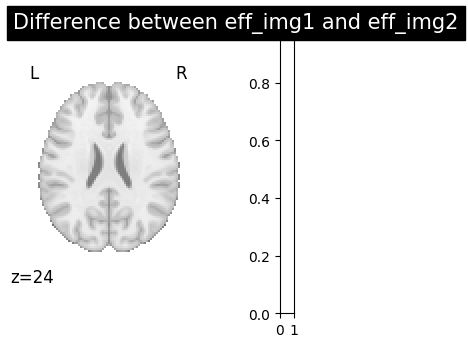

In [72]:
diff_img = math_img('img1 - img2', img1=eff_img1, img2=eff_img2)

# Plot the 24th slice
plot_stat_map(
    diff_img,
    display_mode='z',
    cut_coords=[24],
    title='Difference between eff_img1 and eff_img2',
)

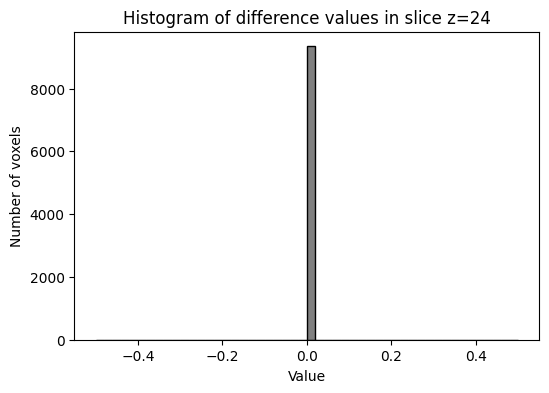

In [76]:
slice_data = diff_img.get_fdata()[:, :, 24]  # z=24

# Flatten to 1D array
slice_flat = slice_data.ravel()

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(slice_flat, bins=50, color='gray', edgecolor='black')
plt.title('Histogram of difference values in slice z=24')
plt.xlabel('Value')
plt.ylabel('Number of voxels')
plt.show()

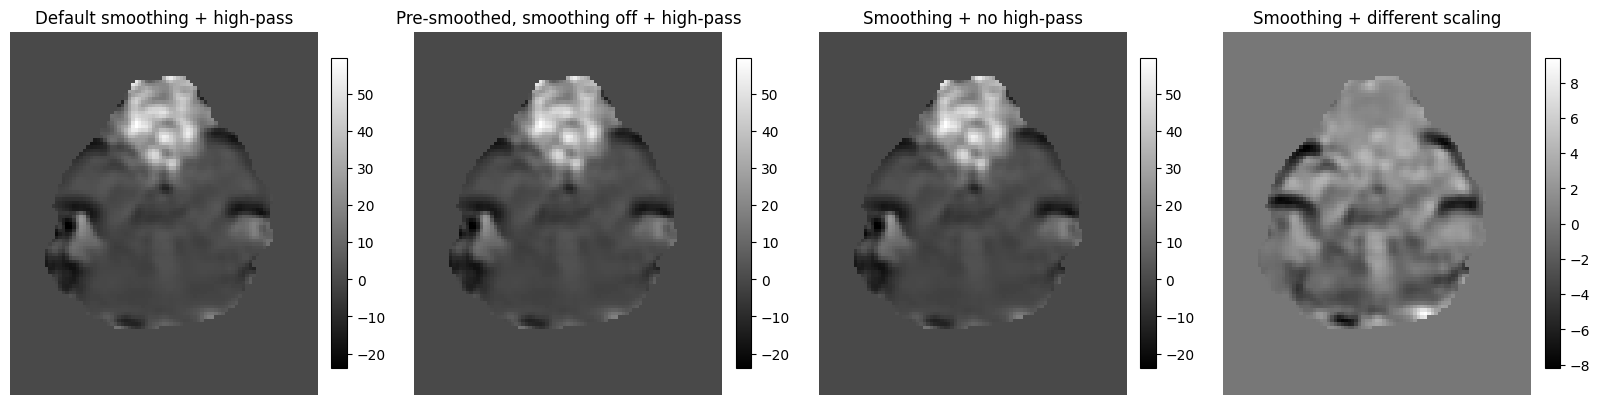

In [70]:
# ---- Plot 24th slice in z-direction ----
slice_z = 24

imgs = [eff_img1, eff_img2, eff_img3, eff_img4]
titles = [
    'Default smoothing + high-pass',
    'Pre-smoothed, smoothing off + high-pass',
    'Smoothing + no high-pass',
    'Smoothing + different scaling',
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, img, title in zip(axes, imgs, titles):
    # Plot slice in matplotlib manually to let each figure scale automatically
    data = img.get_fdata()[:, :, slice_z]
    im = ax.imshow(np.rot90(data), cmap='gray')
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.show()

In [28]:
# Fit FirstLevelModel
fmri_glm_presmoothed = FirstLevelModel(
    t_r=0.68,  # dummy TR, adjust if known
    smoothing_fwhm=None,
    mask_img=mask_img,
)

# Fit with constant regressor
fmri_glm_presmoothed = fmri_glm_presmoothed.fit(
    run_imgs=smoothed_img, design_matrices=design_matrix
)

eff_img_presmoothed = fmri_glm_presmoothed.compute_contrast(
    'constant', output_type='effect_size'
)


/tmp/ipykernel_172764/1090263623.py:9: UserWarning: If design matrices are supplied, [t_r] will be ignored.
  fmri_glm_presmoothed = fmri_glm_presmoothed.fit(


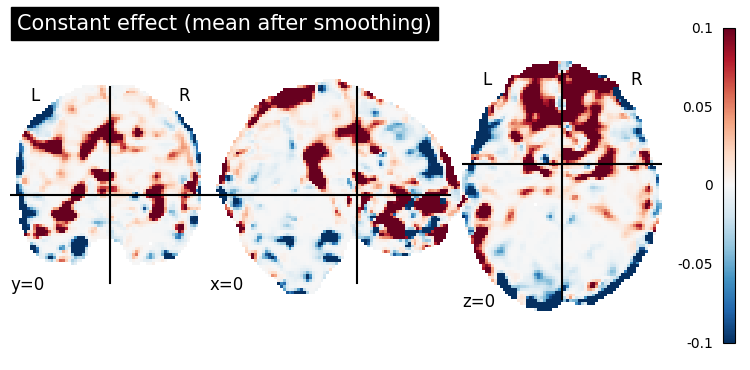

In [27]:
# Get beta for the constant (mean across time)
eff_img = fmri_glm.compute_contrast('constant', output_type='effect_size')

limit = 0.1

# Plot the beta image
plot_stat_map(
    eff_img,
    bg_img=None,  # optional: add a background anatomical if you have one
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    title='Constant effect (mean after smoothing)',
    vmin=-limit,
    vmax=limit,
)

# stat_img.to_filename('~/mean_stat_map.nii.gz')

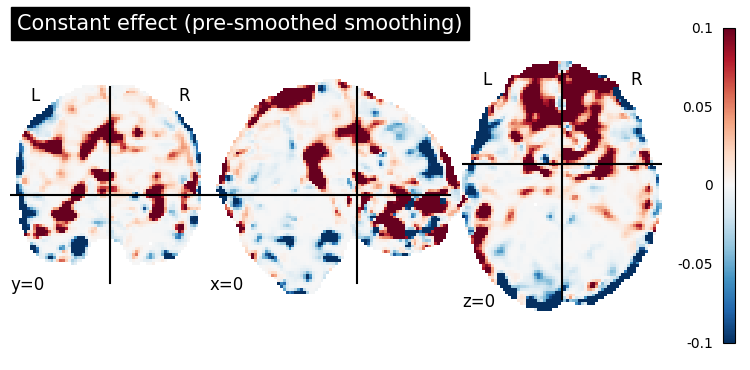

In [29]:
# Plot the beta image
plot_stat_map(
    eff_img_presmoothed,
    bg_img=None,  # optional: add a background anatomical if you have one
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    title='Constant effect (pre-smoothed smoothing)',
    vmin=-limit,
    vmax=limit,
)

/tmp/ipykernel_172764/1872241292.py:4: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  plot_stat_map(diff_img)
/tmp/ipykernel_172764/1872241292.py:4: UserWarning: empty mask
  plot_stat_map(diff_img)


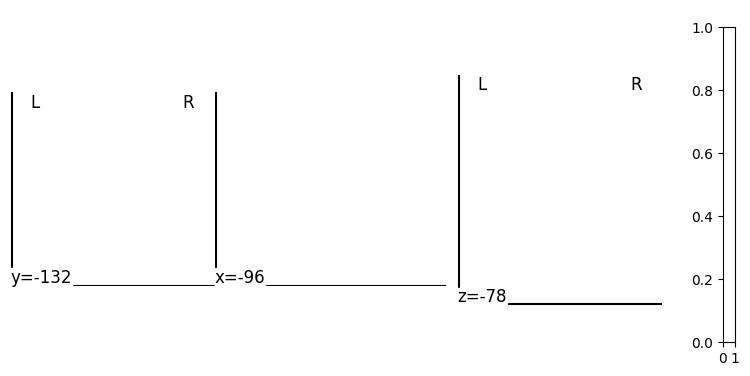

In [30]:
from nilearn.image import math_img

diff_img = math_img('img1 - img2', img1=eff_img, img2=eff_img_presmoothed)
plot_stat_map(diff_img)